## EDA: Matplotlib and Seaborn ##

In this jupyter notebook we will perform Exploratory Data Analysis (EDA) on categorical and numerical columns from the transformed Exclusivity Table located in file exclusivities_tr.xlsx. The analysis will be both, univariate and bivariate. The objective is to start answering the initial questions we have formulated as well as find new patterns and existing relationships between variables. For this aim, we will use two different python libraries for data visualization: matplotlib and seaborn.

In [1]:
#First we need to import the necessary libraries

import seaborn as sns  #library for data viz
import matplotlib.pyplot as plt #library for data viz
import pandas as pd #library for data manipulation and transfomation
pd.set_option("display.max_columns", None) #we configure pandas to display all columns from dataframe when needed.
import numpy as np #to perform calculations with numpy numbers. Just in case we need it.

In [3]:
#Now we need to load the whole dataset. We will start with the products table.

df_ex_tr = pd.read_excel("../1_Data/Data_Transformed/exclusivity_tr.xlsx")
display(df_ex_tr.head())

,Appl_Type,Appl_No,Product_No,Exclusivity_Date,Exclusivity_Type
0,Innovator,17031,1,2026-07-13,RX to OTC Switch or OTC Use
1,Innovator,18680,1,2027-06-28,New Dosing Schedule
2,Innovator,20263,9,2026-04-14,New Strength
3,Innovator,20825,1,2025-01-28,Miscellaneous
4,Innovator,20825,2,2025-01-28,Miscellaneous


In [4]:
df_ex_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Appl_Type         2311 non-null   object        
 1   Appl_No           2311 non-null   int64         
 2   Product_No        2311 non-null   int64         
 3   Exclusivity_Date  2311 non-null   datetime64[ns]
 4   Exclusivity_Type  2311 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 90.4+ KB


In [6]:
df_ex_tr['Appl_No'] = df_ex_tr['Appl_No'].astype('str') #we convert the Appl_No column to string type because it is not really a number, it is an identifier.
df_ex_tr['Product_No'] = df_ex_tr['Product_No'].astype('str') #we convert the Product_No column to string type because it is not really a number, it is an identifier.

### Univariate analysis of categorical columns ###

In [7]:
#First of all, we will create a dataframe just with categorical columns.

df_ex_tr_cat = df_ex_tr.select_dtypes(include='object') #the function select_dtypes returns a filtered df.
df_ex_tr_cat.head()

,Appl_Type,Appl_No,Product_No,Exclusivity_Type
0,Innovator,17031,1,RX to OTC Switch or OTC Use
1,Innovator,18680,1,New Dosing Schedule
2,Innovator,20263,9,New Strength
3,Innovator,20825,1,Miscellaneous
4,Innovator,20825,2,Miscellaneous


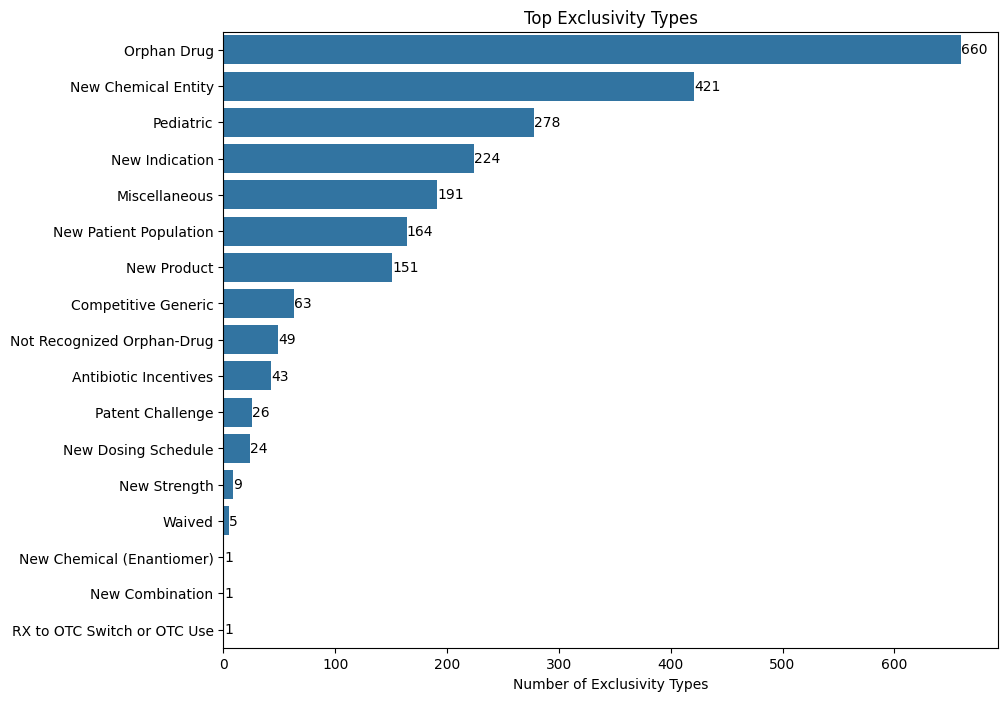

In [29]:
#Univariate analysis of Exclusivity_Type.

# First we need to order the x axis

order = df_ex_tr_cat['Exclusivity_Type'].value_counts().index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_ex_tr_cat,y='Exclusivity_Type', order=order, ax=ax) #here we apply the order we have previously defined.
ax.set_title('Top Exclusivity Types')
ax.set_xlabel('Number of Exclusivity Types')
ax.set_ylabel(None)

df_count = df_ex_tr_cat['Exclusivity_Type'].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=False) #we create a new dataframe with the count of each category. We reset the index to have a clean dataframe and we sort it by count.
df_count.head() #we display the first rows of the new dataframe.

for container in ax.containers:
  ax.bar_label(container, labels = (i for i in df_count['Count'])) #we add the labels to the bars. We use a for loop to iterate over the containers and we use the labels we have previously created.

plt.show() #we show the plot.

In [31]:
#Univariate analysis of Appl_No

df_ex_tr_cat['Appl_No'].nunique() #we check how many unique values we have in the Appl_No column.

652

In [62]:
#Univariate analysis of Appl_Type

df_ex_tr_cat['Appl_Type'].value_counts() #we check how many unique values we have in the Appl_Type column.

Appl_Type
Innovator    2222
Generic        89
Name: count, dtype: int64

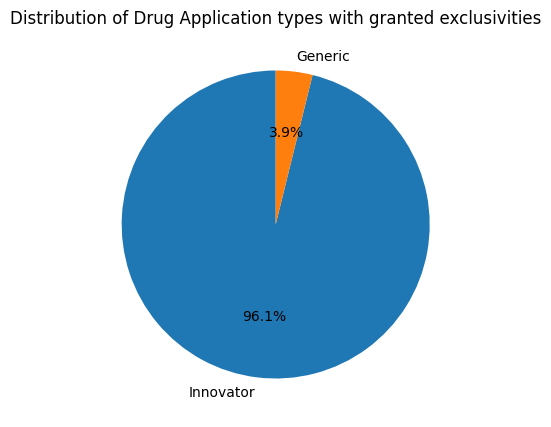

In [73]:
fig, ax = plt.subplots(figsize=(5,5))#it is a good practice to first create a figure with the correct size.
plt.pie(df_ex_tr_cat['Appl_Type'].value_counts(), labels = df_ex_tr_cat['Appl_Type'].value_counts().index, autopct='%1.1f%%', startangle=90) #we create a pie chart with the Appl_Type column. We use autopct to show the percentage of each category and startangle to start the pie chart from the top.
ax.set_title('Distribution of Drug Application types with granted exclusivities')
plt.show() #we show the plot.

### Univariate analysis of Date columns ###

In [35]:
df_ex_tr_date = df_ex_tr.select_dtypes(include='datetime') #we create a new dataframe with the datetime columns.
df_ex_tr_date.head()

,Exclusivity_Date
0,2026-07-13
1,2027-06-28
2,2026-04-14
3,2025-01-28
4,2025-01-28


In [48]:
df_ex_tr_date['Exclusivity_Year_Month'] = df_ex_tr_date['Exclusivity_Date'].dt.to_period('M') #we create a new column with the month and year of the exclusivity date. We use the dt accessor to extract the month and year from the datetime column.
df_ex_tr_date['Exclusivity_Year'] = df_ex_tr_date['Exclusivity_Date'].dt.year #we create a new column with the year of the exclusivity date. We use the dt accessor to extract the year from the datetime column.
df_ex_tr_date = df_ex_tr_date.sort_values(by='Exclusivity_Date')
df_ex_tr_date.head()

,Exclusivity_Date,Exclusivity_Year_Month,Exclusivity_Year
184,2019-05-23,2019-05,2019
174,2019-06-20,2019-06,2019
173,2019-06-20,2019-06,2019
1853,2019-08-06,2019-08,2019
244,2019-08-06,2019-08,2019


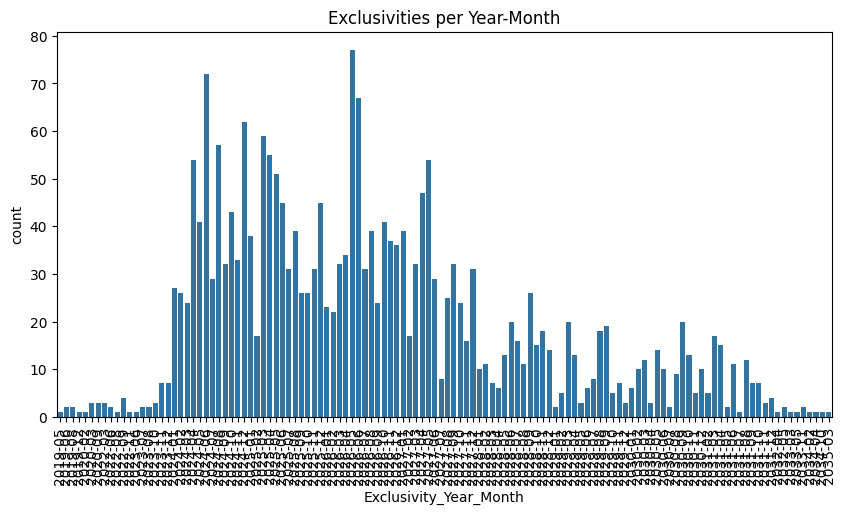

In [76]:
fig, ax = plt.subplots(figsize=(10,5))#it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_ex_tr_date,x='Exclusivity_Year_Month', ax=ax)
ax.set_title('Exclusivities per Year-Month')
plt.xticks(rotation=90) # rotate the x axis labels to avoid overlapping.
plt.show()

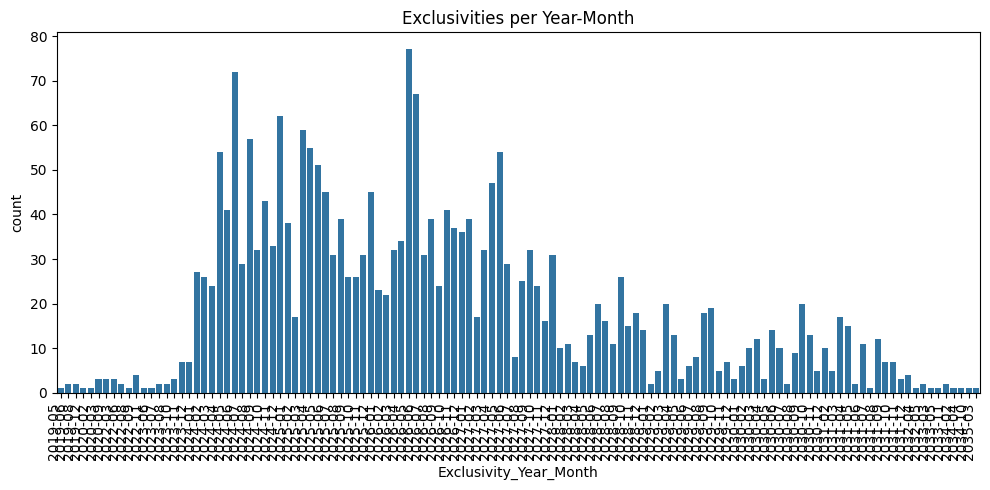

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df_ex_tr_date, x='Exclusivity_Year_Month', ax=ax, width=0.8)  # Reduce bar width
ax.set_title('Exclusivities per Year-Month')
plt.xticks(rotation=90, ha='right')# Rotate x-labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

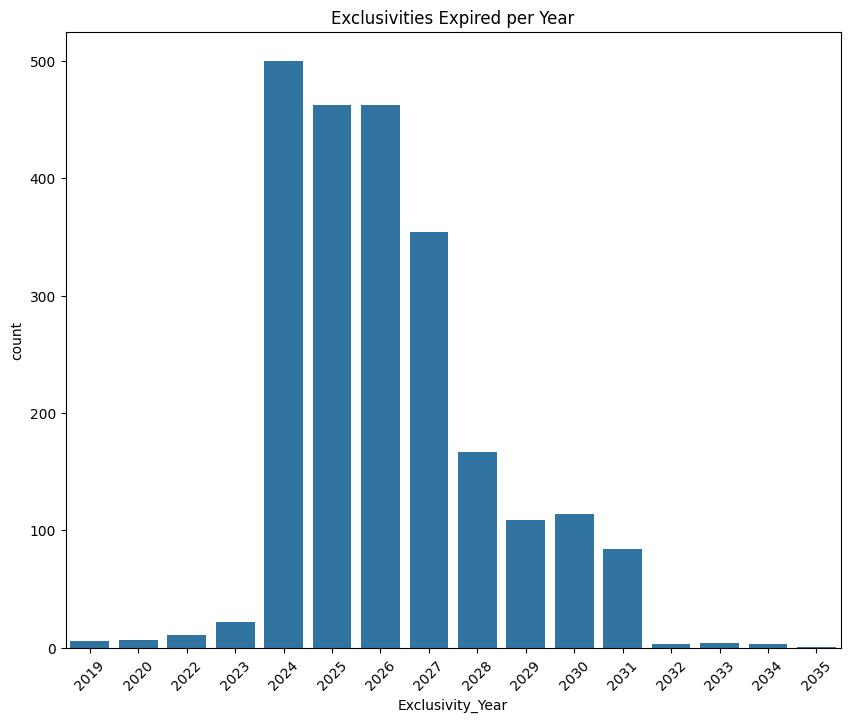

In [63]:
fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_ex_tr_date,x='Exclusivity_Year', ax=ax,) #here we apply the order we have previously defined.
ax.set_title('Exclusivities Expired per Year')
plt.xticks(rotation=45) #we rotate the x axis labels to avoid overlapping.
plt.show()

- Do certain exclusivities tend to be granted together?

Appl_No
17031                         [RX to OTC Switch or OTC Use]
18680                                 [New Dosing Schedule]
19569                                         [Orphan Drug]
200534                                      [Miscellaneous]
200535                       [Miscellaneous, Miscellaneous]
200655                        [Waived, New Chemical Entity]
201194                                      [Miscellaneous]
201280                           [Miscellaneous, Pediatric]
201281    [Miscellaneous, Miscellaneous, Miscellaneous, ...
201292    [Orphan Drug, Miscellaneous, Orphan Drug, Misc...
Name: Exclusivity_Type, dtype: object

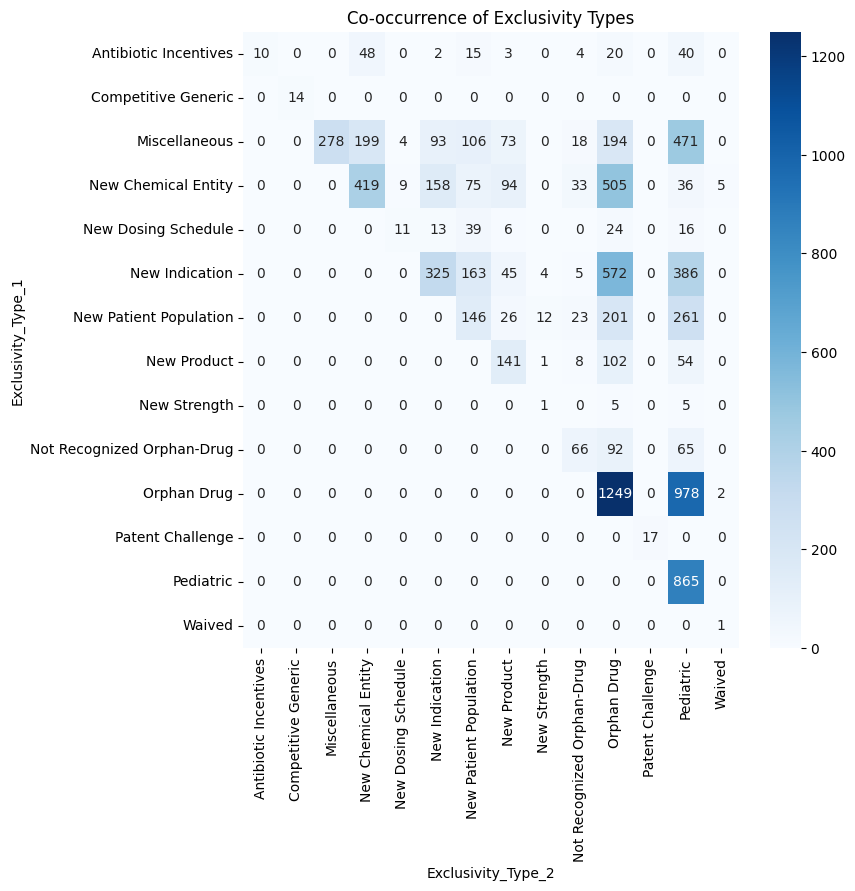

In [77]:
from collections import Counter
from itertools import combinations

# Group by Appl_No and aggregate Exclusivity_Type into lists
exclusivity_groups = df_ex_tr.groupby('Appl_No')['Exclusivity_Type'].apply(list)

display(exclusivity_groups.head(10)) # display the first rows of the new dataframe.

# Create a co-occurrence matrix

co_occurrence = Counter()
for exclusivity_list in exclusivity_groups:
  for pair in combinations(sorted(exclusivity_list), 2):  # Generate all pairs
    co_occurrence[pair] += 1

# Convert the co-occurrence dictionary to a DataFrame
co_occurrence_df = pd.DataFrame(
  [(key[0], key[1], value) for key, value in co_occurrence.items()],
  columns=['Exclusivity_Type_1', 'Exclusivity_Type_2', 'Count']
)

# Pivot the DataFrame to create a matrix
co_occurrence_matrix = co_occurrence_df.pivot(index='Exclusivity_Type_1', columns='Exclusivity_Type_2', values='Count').fillna(0)

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Co-occurrence of Exclusivity Types')
plt.show()

- Which exclusivities are typical from innovator applications? And from generics?

In [80]:
df_ex_tr_cat.loc[df_ex_tr_cat['Appl_Type']=="Innovator", 'Exclusivity_Type'].value_counts() #we check how many unique values we have in the Exclusivity_Type column for New Appl_Type.

Exclusivity_Type
Orphan Drug                    660
New Chemical Entity            421
Pediatric                      278
New Indication                 224
Miscellaneous                  191
New Patient Population         164
New Product                    151
Not Recognized Orphan-Drug      49
Antibiotic Incentives           43
New Dosing Schedule             24
New Strength                     9
Waived                           5
RX to OTC Switch or OTC Use      1
New Chemical (Enantiomer)        1
New Combination                  1
Name: count, dtype: int64

In [81]:
df_ex_tr_cat.loc[df_ex_tr_cat['Appl_Type']=="Generic", 'Exclusivity_Type'].value_counts() #we check how many unique values we have in the Exclusivity_Type column for Generic Appl_Type.

Exclusivity_Type
Competitive Generic    63
Patent Challenge       26
Name: count, dtype: int64